[View in Colaboratory](https://colab.research.google.com/github/aunz/ds/blob/master/Function_approximation_with_NN.ipynb)

Given $x$ and its function $f(x)$, can we model $f(x)$ using neural network

## $f(x) = x^2$



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from time import time

from sklearn.metrics import mean_squared_error

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


# init some data
np.random.seed(0)

X = np.random.rand(5000)
y = X ** 2

# define a scoring method, just root mean square error here
def score(preds, y_true = y, X = X, plot=True):
    if plot:
        plt.scatter(X, y_true, alpha=0.5, s=1, label='y true')
        plt.scatter(X, preds, alpha=0.5, s=1, label='y predicted')
        plt.xlabel('X')
        plt.ylabel('y')
        lgnd = plt.legend()
        lgnd.legendHandles[0]._sizes = [50]
        lgnd.legendHandles[1]._sizes = [50]
    return mean_squared_error(y_true, preds) ** .5


earlyStopping = [EarlyStopping(monitor='loss', patience=1, verbose=1)]

Using TensorFlow backend.


Epoch 00012: early stopping
1) 0.0749. Time: 10s
Epoch 00012: early stopping
2) 0.0748. Time: 10s
Epoch 00008: early stopping
3) 0.0749. Time: 7s
Epoch 00011: early stopping
4) 0.0748. Time: 9s
Epoch 00011: early stopping
5) 0.0749. Time: 9s
Epoch 00008: early stopping
6) 0.0748. Time: 7s
Epoch 00012: early stopping
7) 0.0748. Time: 10s
Epoch 00008: early stopping
8) 0.0748. Time: 7s
Epoch 00004: early stopping
16) 0.0748. Time: 5s
Epoch 00008: early stopping
32) 0.0748. Time: 8s
Epoch 00005: early stopping
64) 0.0748. Time: 6s
Epoch 00005: early stopping
128) 0.0750. Time: 6s
Epoch 00003: early stopping
256) 0.0749. Time: 5s
Epoch 00003: early stopping
512) 0.0748. Time: 5s
Epoch 00003: early stopping
1024) 0.0751. Time: 5s
CPU times: user 2min 5s, sys: 11.8 s, total: 2min 16s
Wall time: 1min 48s


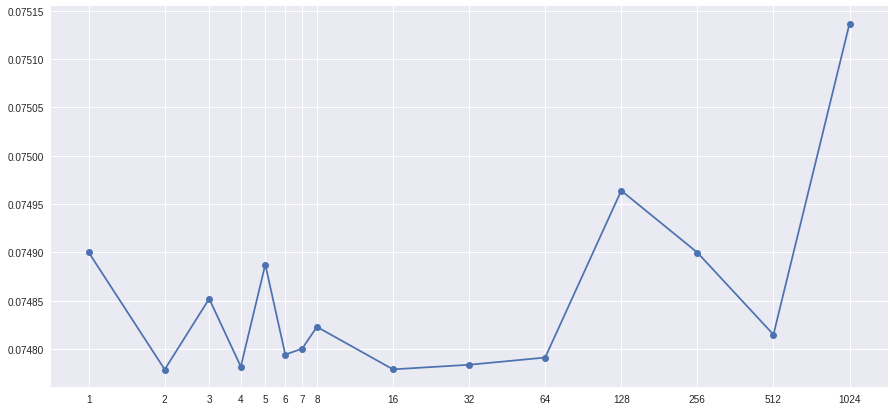

In [11]:
%%time
# tuning for number of neurons in the first hidden layer
# from tqdm import tqdm # for progress bar

scores = []
models = []
ranges = list(range(1, 8)) + [2 ** i for i in range(3, 11)]

for i in ranges:
    start = time()
    model = Sequential()
    model.add(Dense(i, input_shape=(1,)))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='adamax')
    model.fit(X, y, epochs=1000, callbacks=earlyStopping, verbose=0)
    models.append(model)

    s1 = score(model.predict(X), plot=0)
    time_taken = time() - start

    scores.append(s1)

    print(f'''{i}) {s1:.4f}. Time: {time_taken:.0f}s''')
    
plt.figure(figsize=(15, 7))
plt.plot(np.log2(ranges), scores, '-o')
plt.xticks(np.log2(ranges), ranges)

0.07490020506646722

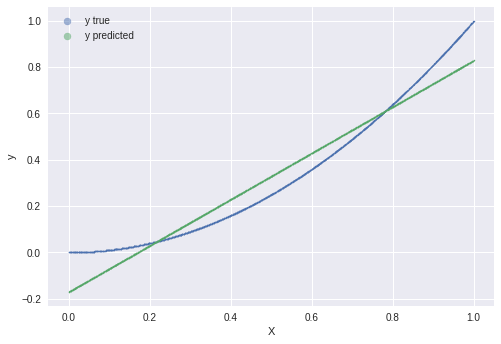

In [12]:
score(models[0].predict(X))

Epoch 00005: early stopping
1) 0.0748. Time: 6s
Epoch 00006: early stopping
2) 0.0748. Time: 7s
Epoch 00005: early stopping
3) 0.0753. Time: 7s
Epoch 00003: early stopping
4) 0.0753. Time: 6s
Epoch 00005: early stopping
5) 0.0780. Time: 8s
Epoch 00004: early stopping
6) 0.0820. Time: 7s
Epoch 00004: early stopping
7) 0.0923. Time: 8s
Epoch 00003: early stopping
8) 0.0793. Time: 7s
CPU times: user 1min, sys: 4.81 s, total: 1min 5s
Wall time: 55.9 s


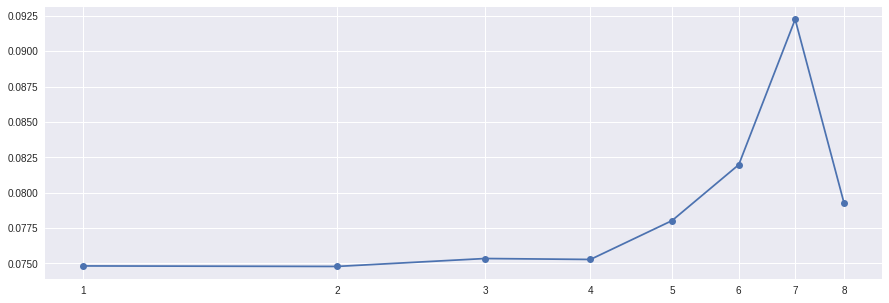

In [13]:
%%time
# tuning for number of hidden layers, each with 4 neurons

scores = []
models = []
ranges = list(range(1, 9))

for i in ranges:
    start = time()
    model = Sequential()
    model.add(Dense(4, input_shape=(1,)))
    for j in range(1, i): model.add(Dense(4))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop')
    model.fit(X, y, epochs=1000, callbacks=earlyStopping, verbose=0)
    models.append(model)

    s1 = score(model.predict(X), plot=0)
    scores.append(s1)
    time_taken = time() - start

    print(f'''{i}) {s1:.4f}. Time: {time_taken:.0f}s''')
    
plt.figure(figsize=(15, 5))
plt.plot(np.log2(ranges), scores, '-o')
plt.xticks(np.log2(ranges), ranges)

0.07482559384682069

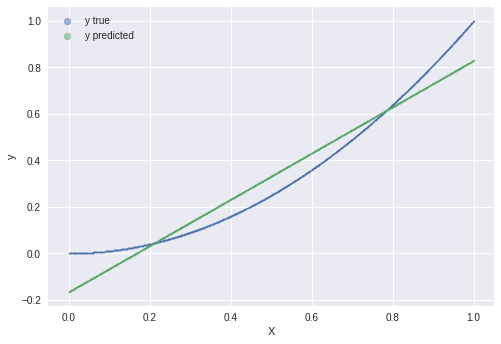

In [14]:
score(models[0].predict(X))

We see that NN can only predict a straight line here (green line)!

🙄

More work is needed

Epoch 00091: early stopping
1) 0.0049. Time: 60s
Epoch 00132: early stopping
2) 0.0043. Time: 87s
Epoch 00119: early stopping
3) 0.0039. Time: 79s
Epoch 00056: early stopping
4) 0.0736. Time: 40s
Epoch 00041: early stopping
5) 0.0729. Time: 31s
Epoch 00039: early stopping
6) 0.0736. Time: 28s
Epoch 00129: early stopping
7) 0.0039. Time: 86s
Epoch 00038: early stopping
8) 0.0740. Time: 28s
Epoch 00018: early stopping
16) 0.0798. Time: 15s
Epoch 00018: early stopping
32) 0.0787. Time: 15s
Epoch 00013: early stopping
64) 0.0769. Time: 12s
Epoch 00011: early stopping
128) 0.0760. Time: 11s
Epoch 00012: early stopping
256) 0.0755. Time: 12s
Epoch 00005: early stopping
512) 0.0770. Time: 7s
Epoch 00004: early stopping
1024) 0.0778. Time: 6s
CPU times: user 10min 28s, sys: 1min 9s, total: 11min 37s
Wall time: 8min 37s


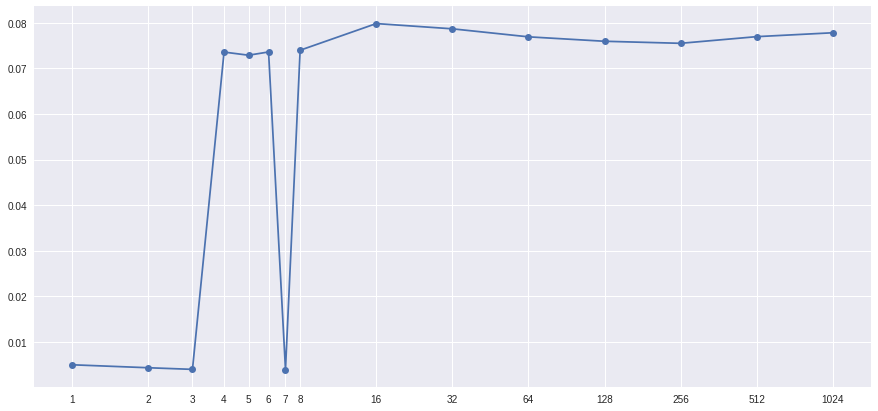

In [15]:
%%time
# use activation: sigmoid

scores = []
models = []
ranges = list(range(1, 8)) + [2 ** i for i in range(3, 11)]

for i in ranges:
    start = time()
    model = Sequential()
    model.add(Dense(i, input_shape=(1,), activation='sigmoid')) # <- use sigmoid here 
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='adamax')
    model.fit(X, y, epochs=1000, callbacks=earlyStopping, verbose=0)
    models.append(model)

    s1 = score(model.predict(X), plot=0)
    scores.append(s1)

    time_taken = time() - start

    print(f'''{i}) {s1:.4f}. Time: {time_taken:.0f}s''')
    
plt.figure(figsize=(15, 7))
plt.plot(np.log2(ranges), scores, '-o')
plt.xticks(np.log2(ranges), ranges)

Yay, now NN has learned to model $x^2$ when $x \in [0, 1]$

0.004946833773808786

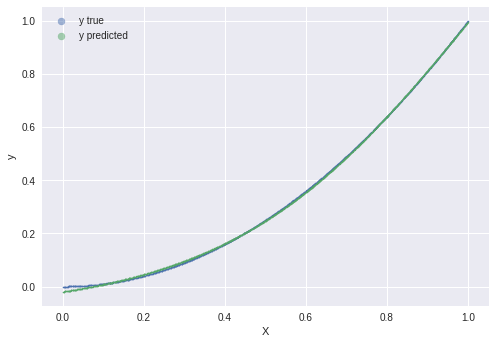

In [16]:
score(models[0].predict(X))

Epoch 00130: early stopping
1) 0.0085. Time: 85s
Epoch 00071: early stopping
2) 0.0077. Time: 55s
Epoch 00029: early stopping
3) 0.0065. Time: 27s
Epoch 00024: early stopping
4) 0.0064. Time: 26s
Epoch 00008: early stopping
5) 0.2990. Time: 13s
Epoch 00008: early stopping
6) 0.2993. Time: 13s
Epoch 00003: early stopping
7) 0.2993. Time: 8s
Epoch 00003: early stopping
8) 0.2993. Time: 9s
CPU times: user 4min 33s, sys: 27.5 s, total: 5min
Wall time: 3min 55s


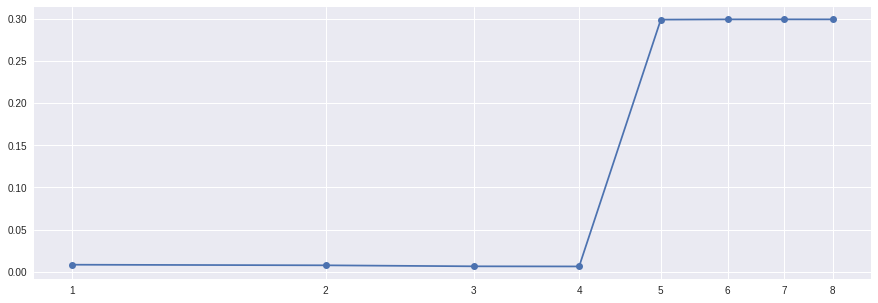

In [17]:
%%time
# tuning for number of hidden layers, each with 4 neurons

scores = []
models = []
ranges = list(range(1, 9))

for i in ranges:
    start = time()
    model = Sequential()
    model.add(Dense(4, input_shape=(1,), activation='sigmoid'))
    for j in range(1, i): model.add(Dense(4, activation='sigmoid'))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop')
    model.fit(X, y, epochs=1000, callbacks=earlyStopping, verbose=0)
    models.append(model)

    s1 = score(model.predict(X), plot=0)
    scores.append(s1)
    time_taken = time() - start

    print(f'''{i}) {s1:.4f}. Time: {time_taken:.0f}s''')
    
plt.figure(figsize=(15, 5))
plt.plot(np.log2(ranges), scores, '-o')
plt.xticks(np.log2(ranges), ranges)

0.2990221691050234

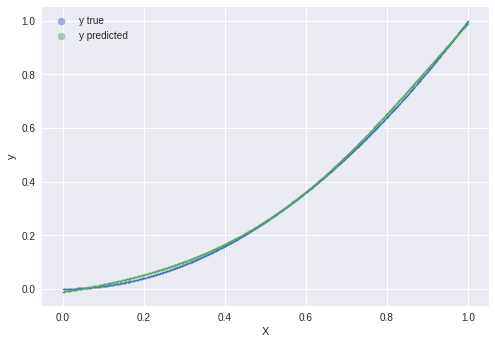

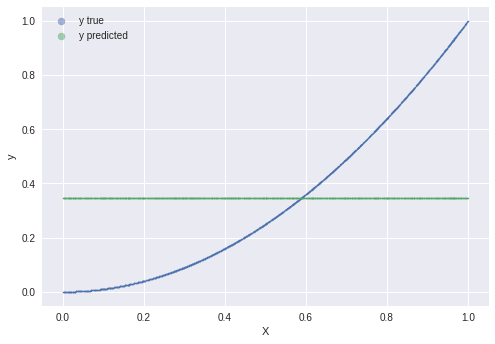

In [21]:
score(models[0].predict(X))
plt.figure();
score(models[4].predict(X)) # More layers are not necessarily better